In [1]:
import torch
import numpy

import environment
import utils
import intervention
from simulation import LoanApplication
import agent

import importlib
importlib.reload(intervention)
importlib.reload(environment)
importlib.reload(agent)

<module 'agent' from '/Users/alicia/Desktop/Research/fairness_gym/agent.py'>

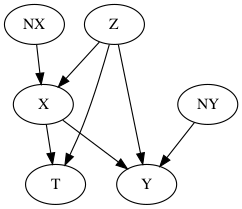

In [2]:
loan_env = LoanApplication()
# sem.summary()
sem = loan_env.sem
sem.draw()

#### Specify the structural equations

In [3]:
# All vertices
print("All vertices: ", sem.vertices())
# Root vertices => provide distributions
print("Roots: ", sem.roots())
# Non root vertices => provide equations making use of all parents
print("Non-roots: ", sem.non_roots())

All vertices:  ['NZ', 'NX', 'NT', 'NY', 'Z', 'T', 'X', 'Y']
Roots:  ['NZ', 'NX', 'NT', 'NY', 'Z']
Non-roots:  ['T', 'X', 'Y']


### sample from the SEM models
* score = [300,850]
* disadvantaged group: X~N(450,25)
* advantaged group: X~N(500,50)

In [4]:
def simulation(env, agent, num_steps = 100):
    utilities = []
    scores = []
    env._init_environment()
    env.plot_state_distribution(target='X')
    for i in range(num_steps):
        cur_state = env.states[-1]
        action = agent.get_action(cur_state)
        reward = env.update(action)
        utilities.append(reward)
        scores.append(env.avg_outcome(target='X'))
    env.plot_state_distribution(target='X')

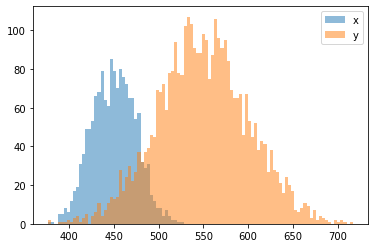

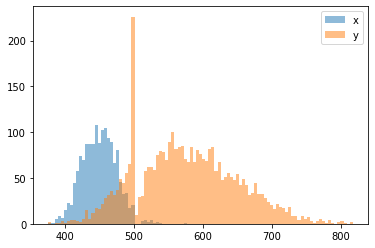

In [5]:
action_space = [0,1]
agent_max_profit = agent.Agent('max_profit', action_space)
simulation(loan_env, agent_max_profit, num_steps=200)

## Equalized Opportunity

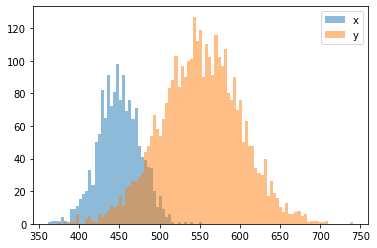

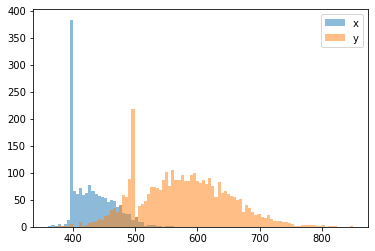

In [6]:
loan_env = LoanApplication()
agent_eo = agent.Agent('eo', action_space)
simulation(loan_env, agent_eo, num_steps=200)

### learn a function for f_T(X,Z)

In [ ]:
max \sum_i reward_i - D()
if z=0:
f_t = W_1*[X]+b = 
z=1:
f_t = a_2*X    

sigmod, logistic-sigmoid